# Assignment_8: Data Visualization

# Name: Kumar R.

In this assignment we are going to transform iris data into 3 dimensions
and plot a 3d chart with transformed dimensions and colour each data
point with specific class.

In [1]:
# Importing the necessory visualization packages.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls

In [3]:
import cufflinks as cf

In [4]:
cf.go_offline()
cf.set_config_file(theme='polar')

In [5]:
#Load the IRIS dataset
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
#Seperating the feature and label to perform Dimensionality reduction on features
feature = df.iloc[:,:-1].values
label = df.iloc[:,-1].values

In [7]:
#Importing PCA from sklearn.
from sklearn.decomposition import PCA
pca = PCA(n_components=3) #Reducing the features into 3.
principalfeatures = pca.fit_transform(feature) #Performing fit and transform on the features

pcadata = pd.DataFrame(data = principalfeatures , columns=['PCA-1','PCA-2','PCA-3']) #creating a dataframe


In [8]:
pcadata.head()

,PCA-1,PCA-2,PCA-3
0,-2.684126,0.319397,-0.027915
1,-2.714142,-0.177001,-0.210464
2,-2.888991,-0.144949,0.017900
3,-2.745343,-0.318299,0.031559
4,-2.728717,0.326755,0.090079


In [9]:
#Concatination of PCA dataframe and label values
finaldata = pd.concat([pcadata, df.iloc[:,-1]], axis=1)
finaldata.head()

,PCA-1,PCA-2,PCA-3,species
0,-2.684126,0.319397,-0.027915,setosa
1,-2.714142,-0.177001,-0.210464,setosa
2,-2.888991,-0.144949,0.017900,setosa
3,-2.745343,-0.318299,0.031559,setosa
4,-2.728717,0.326755,0.090079,setosa


In [10]:
#Ploting 3d plot using iplot which was taught in the class.
color = ['red','green','blue']
finaldata.iplot(kind='surface',categories='species' ,colors = color ,title='Iris Datasett', xTitle='Principalcomponent-1', yTitle='Principalcomponent-2',zTitle='Principalcomponent-3', x='PCA-1',y='PCA-2',z='PCA-3')

C:\Users\Kumar\anaconda3\lib\site-packages\cufflinks\plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

C:\Users\Kumar\anaconda3\lib\site-packages\cufflinks\plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



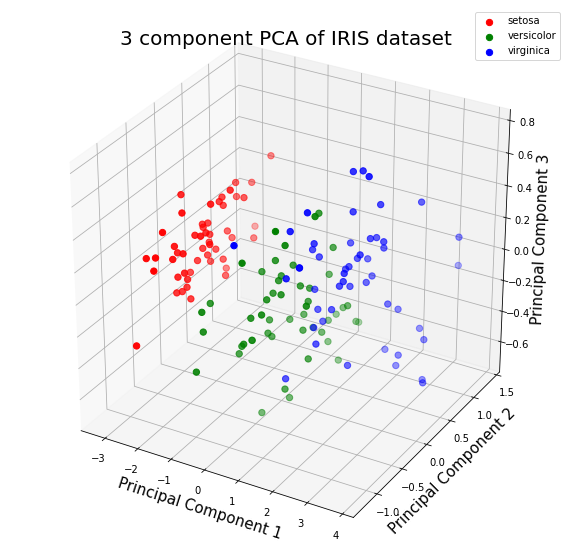

In [11]:
#Ploting 3d view of IRIS dataset using another method.
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10,10)) #reating a figure 
ax = fig.add_subplot(111, projection='3d') #adding subplots
ax.set_xlabel('Principal Component 1', fontsize = 15) #Naming x_label
ax.set_ylabel('Principal Component 2', fontsize = 15) #naming y_label
ax.set_zlabel('Principal Component 3', fontsize = 15) #naming z_label
ax.set_title('3 component PCA of IRIS dataset', fontsize = 20) #Title of the 3d plot

labels = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for label, color in zip(labels,colors):
    indicesToKeep = finaldata['species'] == label
    ax.scatter(finaldata.loc[indicesToKeep, 'PCA-1']
               , finaldata.loc[indicesToKeep, 'PCA-2']
               , finaldata.loc[indicesToKeep, 'PCA-3']
               , c = color
               , s = 40)
ax.legend(labels)
ax.grid()
plt.show()